In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

**Loading the dataset from the downloaded CSV file**

In [2]:
mcdonalds_path = '../input/mcdonalds/mcdonalds.csv'
mcdonalds = pd.read_csv(mcdonalds_path)
print(mcdonalds.columns.tolist())
print(mcdonalds.shape)
print(mcdonalds.head(3))

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


**Displaying Column names**

In [3]:
MD_x = mcdonalds.iloc[:, 0:11].copy()
MD_x = (MD_x == "Yes").astype(int)
# Calculate column means
column_means = np.round(MD_x.mean(), 2)
print(column_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


**Displaying Summary**

In [4]:
# Perform PCA
MD_pca = PCA()
MD_pca.fit(MD_x)
print("Importance of components:")
print(pd.DataFrame({
    "Standard deviation": np.round(MD_pca.explained_variance_, 4),
    "Proportion of Variance": np.round(MD_pca.explained_variance_ratio_, 4),
    "Cumulative Proportion": np.round(np.cumsum(MD_pca.explained_variance_ratio_), 4)
}))


Importance of components:
    Standard deviation  Proportion of Variance  Cumulative Proportion
0               0.5731                  0.2994                 0.2994
1               0.3690                  0.1928                 0.4922
2               0.2546                  0.1330                 0.6253
3               0.1590                  0.0831                 0.7084
4               0.1138                  0.0595                 0.7679
5               0.0963                  0.0503                 0.8182
6               0.0839                  0.0438                 0.8620
7               0.0757                  0.0395                 0.9016
8               0.0704                  0.0368                 0.9383
9               0.0619                  0.0324                 0.9707
10              0.0561                  0.0293                 1.0000


**Printing the standard deviations and rotation matrix of the PCA object**

In [5]:
def print_pca(pca_obj, digits):
    print("Standard deviations (1, .., p={}):".format(pca_obj.n_components_))
    print(np.round(pca_obj.explained_variance_, digits))
    print("Rotation (n x k) = ({} x {}):".format(pca_obj.components_.shape[1], pca_obj.components_.shape[0]))
    print(np.round(pca_obj.components_, digits))
print_pca(MD_pca, digits=1)


Standard deviations (1, .., p=11):
[0.6 0.4 0.3 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Rotation (n x k) = (11 x 11):
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


**Plotting PCA**

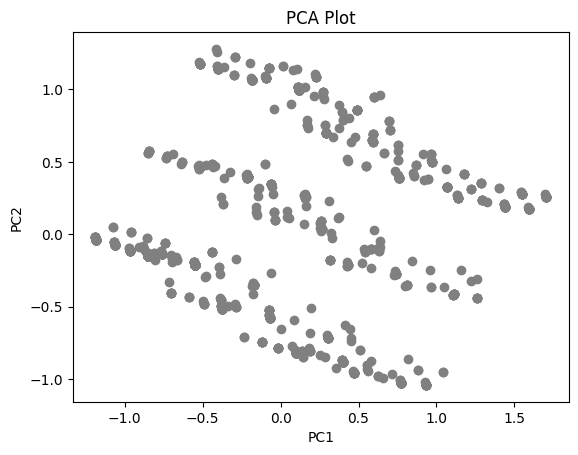

In [6]:
MD_pca = PCA()
MD_pca.fit(MD_x)
transformed_data = MD_pca.transform(MD_x)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color='grey')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Plot")
plt.show()


**Printing Cluster Labels**

In [7]:
np.random.seed(1234)
k_values = range(2, 9)
best_model = None
best_score = float('inf')
for k in k_values:
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    model.fit(MD_x)
    if model.inertia_ < best_score:
        best_model = model
        best_score = model.inertia_
cluster_labels = best_model.labels_
print(cluster_labels)


[4 2 5 ... 5 3 0]


**Plotting using Elbow method**

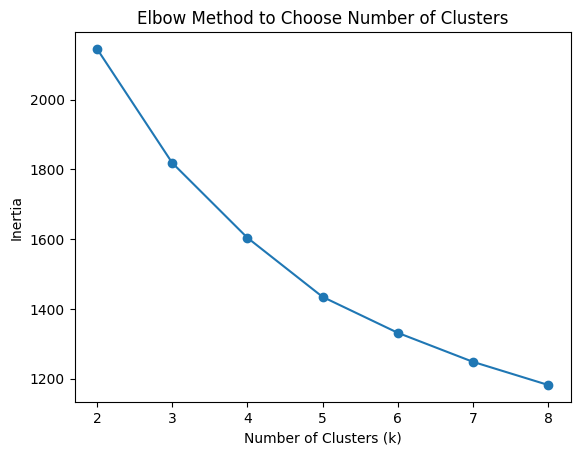

In [8]:
k_values = range(2, 9)  
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Choose Number of Clusters")
plt.show()
